<a href="https://colab.research.google.com/github/saitarunyadav/Miniproject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.15 s (started: 2021-06-19 14:42:18 +00:00)


In [45]:
!mkdir Images

mkdir: cannot create directory ‘Images’: File exists
time: 125 ms (started: 2021-06-19 14:42:21 +00:00)


In [47]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/Images'
CATEGORIES = ['Cloudy','Rainy','Shine','Sunrise']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img  in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 25.2 s (started: 2021-06-19 14:44:18 +00:00)


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)

time: 59.4 ms (started: 2021-06-19 14:48:41 +00:00)


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 12min 25s (started: 2021-06-19 15:06:11 +00:00)


In [55]:
y_pred = clf.predict(x_test)
y_pred

array([3, 2, 1, 0, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 3, 3, 1,
       1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       3, 0, 3, 0, 2, 3, 3, 1, 3, 2, 1, 1, 3, 3, 3, 3, 1, 3, 3, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 3])

time: 869 ms (started: 2021-06-19 15:20:04 +00:00)


In [56]:
y_test

array([3, 0, 1, 0, 3, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 3, 3, 0,
       0, 3, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       3, 3, 3, 0, 2, 3, 3, 1, 3, 2, 1, 1, 3, 3, 3, 3, 1, 3, 3, 2, 2, 2,
       2, 1, 0, 2, 2, 3, 2, 3])

time: 3.39 ms (started: 2021-06-19 15:20:14 +00:00)


In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.65 ms (started: 2021-06-19 15:20:51 +00:00)


In [58]:
accuracy_score(y_pred,y_test)

0.8108108108108109

time: 7.16 ms (started: 2021-06-19 15:21:12 +00:00)


In [59]:
confusion_matrix(y_pred,y_test)

array([[ 3,  0,  1,  1],
       [ 7, 19,  1,  0],
       [ 1,  2, 14,  1],
       [ 0,  0,  0, 24]])

time: 9.78 ms (started: 2021-06-19 15:21:31 +00:00)


In [60]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 93.1 ms (started: 2021-06-19 15:22:58 +00:00)


In [61]:
model = pickle.load(open('img_model.p','rb'))

time: 48.4 ms (started: 2021-06-19 15:24:01 +00:00)


Enter your URLhttps://images.theconversation.com/files/232705/original/file-20180820-30593-1nxanpj.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=496&fit=clip.jpg
(331, 496, 3)
 PREDICTED OUTPUT: Cloudy


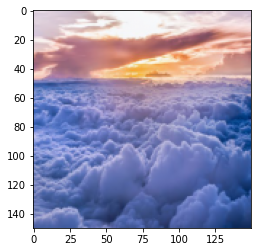

time: 8.69 s (started: 2021-06-19 15:41:32 +00:00)


In [66]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [67]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

time: 5.62 s (started: 2021-06-19 15:43:28 +00:00)


In [70]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Weather Image classification')
st.text('Upload your image')
model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploaded("Chose an image...",type='jpg')
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['Cloudy','Rainy','Shine','Sunrise']
    st.write('Result...')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')

Overwriting app.py
time: 5.82 ms (started: 2021-06-19 15:54:43 +00:00)


In [69]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://b14764f978cd.ngrok.io" -> "http://localhost:80">

time: 1.26 s (started: 2021-06-19 15:45:43 +00:00)
